In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files
from sklearn.preprocessing import StandardScaler

uploaded = files.upload()

house_df = pd.read_csv('kc_house_data.csv')

Saving kc_house_data.csv to kc_house_data.csv


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [ ]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

#Hint: .fit()

LinearRegression()

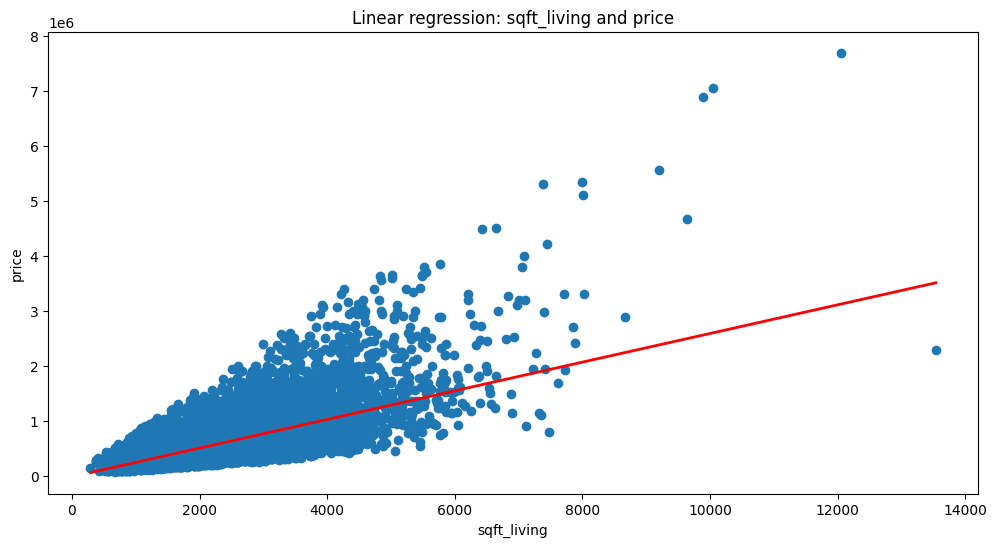

In [ ]:
#b)

#Your code:

y_pred = model.predict(X_test_scaled)

#Evaluate

r2 = model.score(X_test_scaled, y_test)
coefficients = model.coef_
intercept = model.intercept_

#Visualize

fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(house_df['sqft_living'], house_df['price'])

start = house_df['sqft_living'].min()
end = house_df['sqft_living'].max()
xseq = np.linspace(start, end, num=100)

xseq_scaled = scaler.transform(xseq.reshape(-1, 1))

ax.plot(xseq, intercept + coefficients[0] * xseq_scaled.ravel(),
        color="red", lw=2.0, label='Fitted line')

ax.set_title('Linear regression: sqft_living and price')
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')

plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

Order: 1, R2 score: 0.5430425707472814 


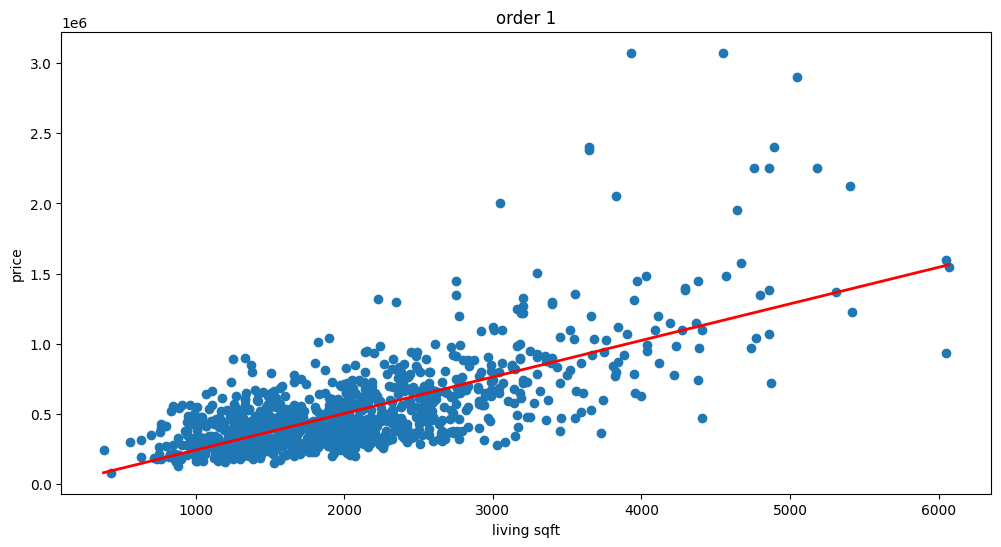

Order: 2, R2 score: 0.5677597286942087 


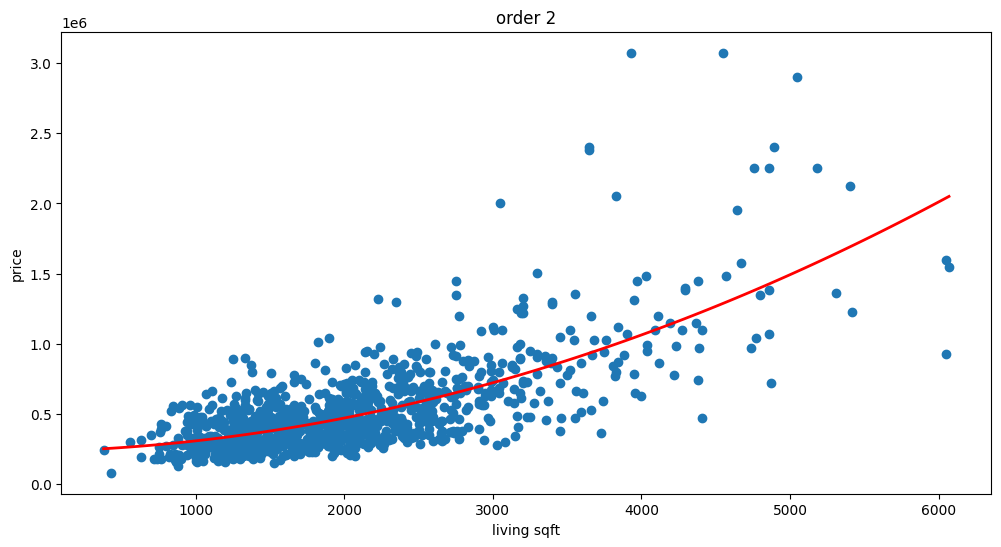

Order: 3, R2 score: 0.5645001769260785 


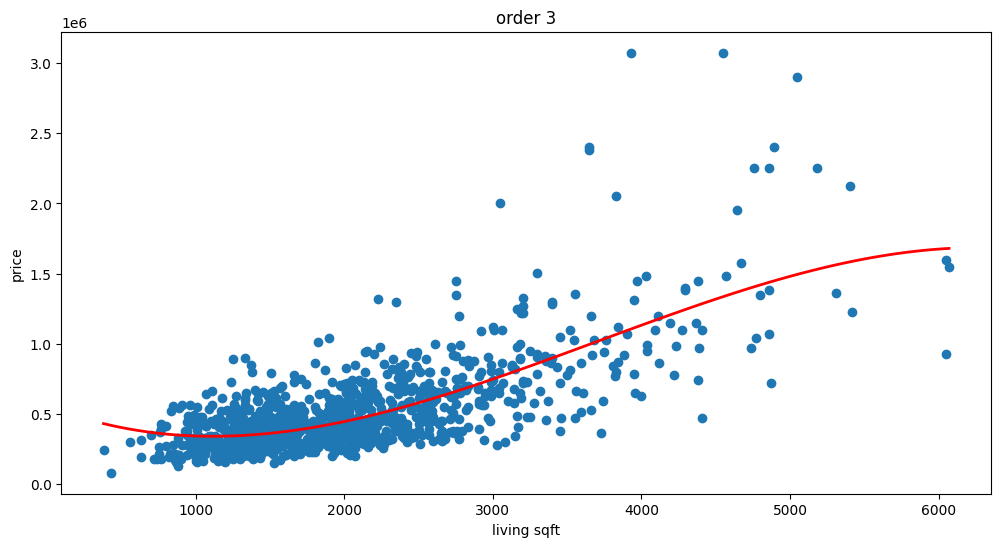

Order: 4, R2 score: 0.5662459517770047 


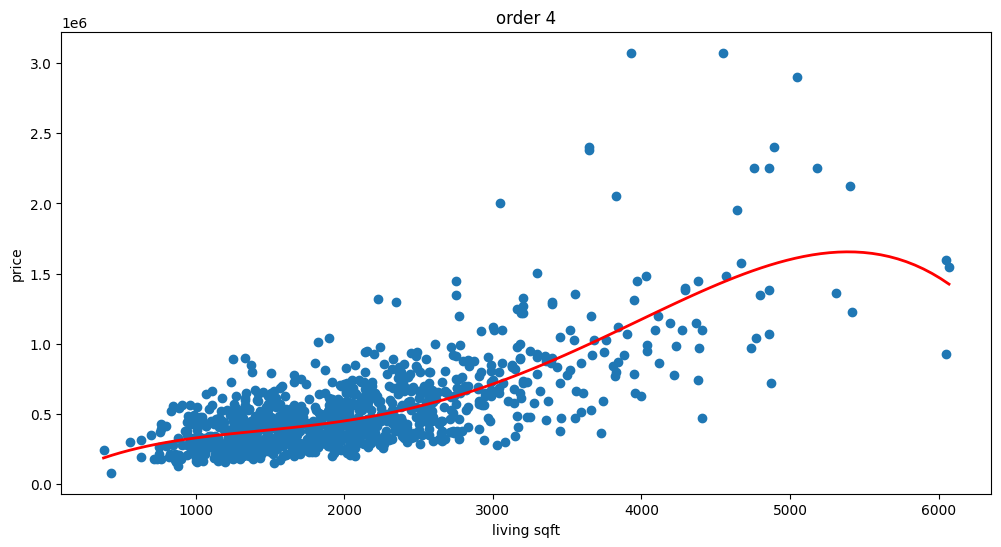

Order: 5, R2 score: 0.5699558980050069 


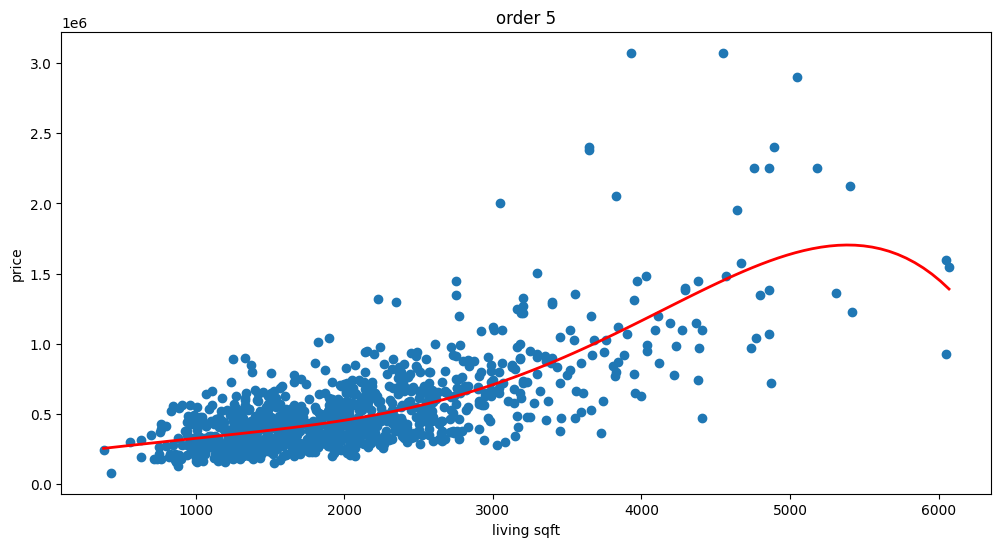

Order: 6, R2 score: 0.5758864279623657 


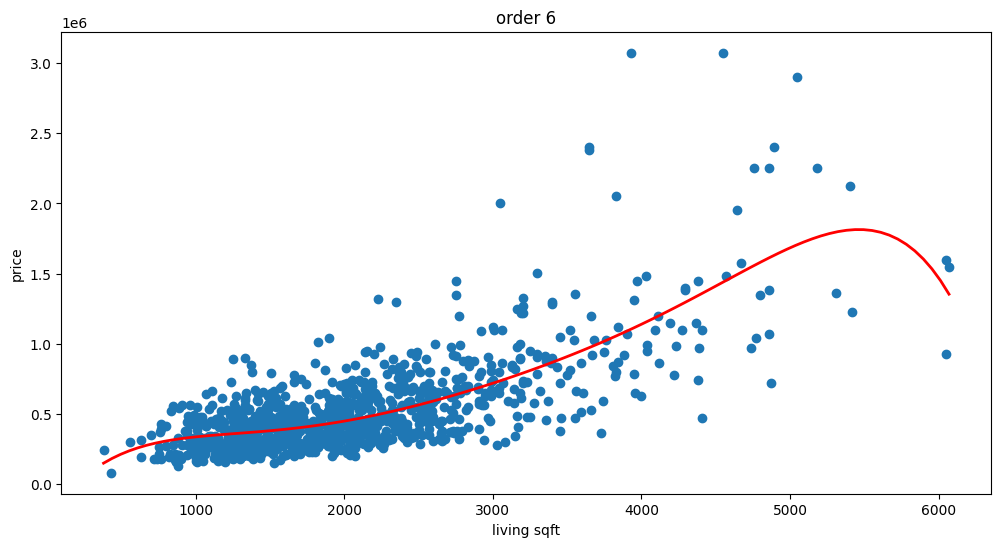

Order: 7, R2 score: 0.5747349081544741 


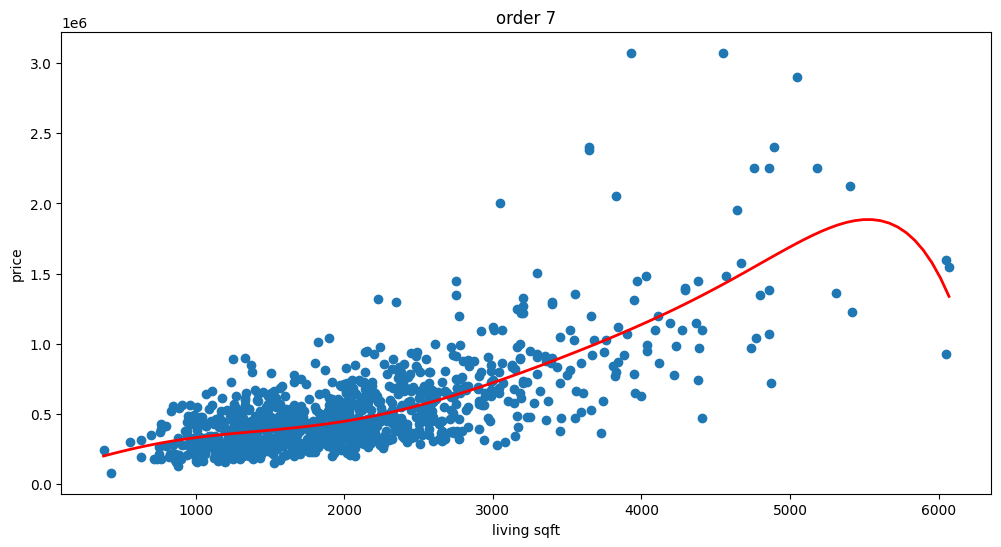

Order: 8, R2 score: 0.5638704479035442 


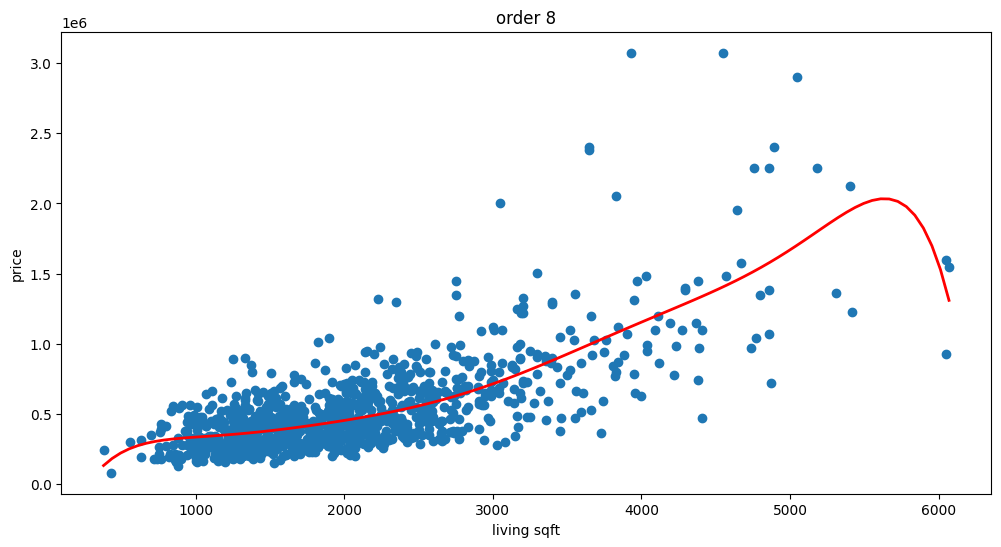

In [ ]:
#c)

orders = []
r2_scores = []


for order in range(1, 9):

    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.2, random_state=37)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    r2 = model.score(X_test_scaled, y_test)

    #Visualize
    fig, ax = plt.subplots(figsize=(12,6))

    ax.scatter(X, y)

    start = X.min()
    end = X.max()
    xseq = np.linspace(start, end, num=100)

    xseq_poly = poly.transform(xseq.reshape(-1, 1))
    xseq_poly_scaled = scaler.transform(xseq_poly)
    y_pred_line = model.predict(xseq_poly_scaled)

    ax.plot(xseq, y_pred_line, color="red", lw=2.0)

    ax.set_title(f'order {order}')
    ax.set_xlabel('living sqft')
    ax.set_ylabel('price')

    print(f"Order: {order}, R2 score: {r2} ")
    orders.append(order)
    r2_scores.append(r2)

    plt.show()



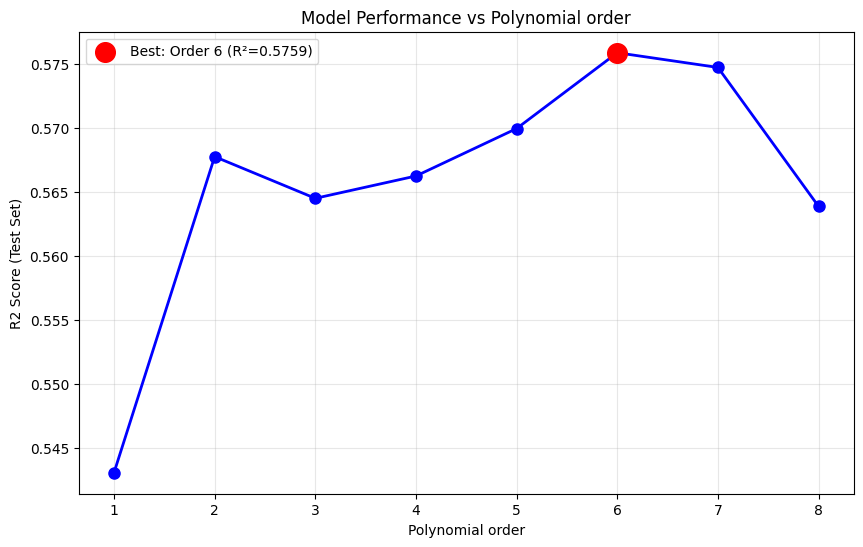

In [ ]:
#Your code:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(orders, r2_scores, marker='o', linewidth=2, markersize=8, color='blue')

ax.set_xlabel('Polynomial order')
ax.set_ylabel('R2 Score (Test Set)')
ax.set_title('Model Performance vs Polynomial order')
ax.grid(True, alpha=0.3)

# Mark the best order
best_idx = np.argmax(r2_scores)
best_order = orders[best_idx]
best_score = r2_scores[best_idx]

ax.scatter(best_order, best_score, color='red', s=200, zorder=5,
           label=f'Best: Order {best_order} (R²={best_score:.4f})')
ax.legend()

plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

Order 1: Train R² = 0.4927, Test R² = 0.5020
Order 2: Train R² = 0.5221, Test R² = 0.5235
Order 3: Train R² = 0.5310, Test R² = 0.5329
Order 4: Train R² = 0.5440, Test R² = 0.5305
Order 5: Train R² = 0.5482, Test R² = 0.5236
Order 6: Train R² = 0.5570, Test R² = 0.4991
Order 7: Train R² = 0.5581, Test R² = 0.4914
Order 8: Train R² = 0.5581, Test R² = 0.4921


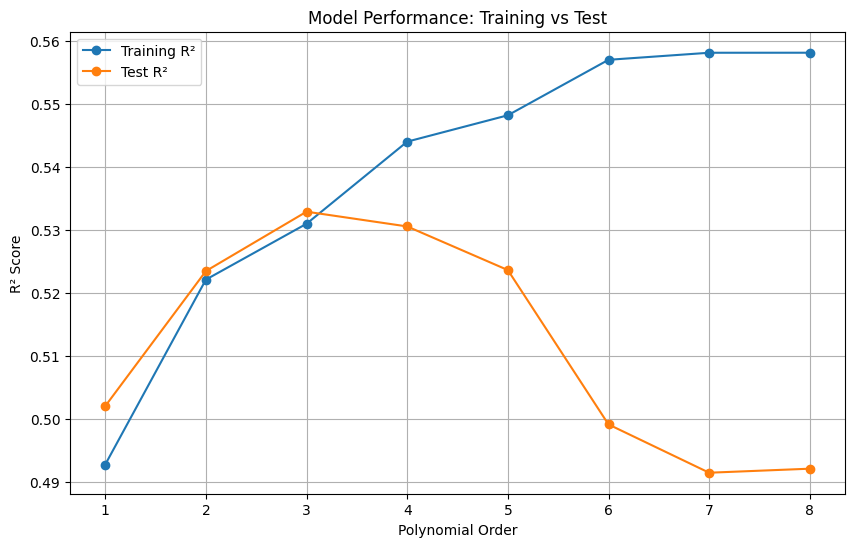

In [ ]:
#a)
orders = []
train_r2_scores = []
test_r2_scores = []

for order in range(1, 9):

    poly = PolynomialFeatures(order, include_bias=False)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=44)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    train_r2 = model.score(X_train_scaled, y_train)
    test_r2 = model.score(X_test_scaled, y_test)

    orders.append(order)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f"Order {order}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(orders, train_r2_scores, marker='o', label='Training R²')
plt.plot(orders, test_r2_scores, marker='o', label='Test R²')
plt.xlabel('Polynomial Order')
plt.ylabel('R² Score')
plt.title('Model Performance: Training vs Test')
plt.legend()
plt.grid(True)
plt.show()



## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

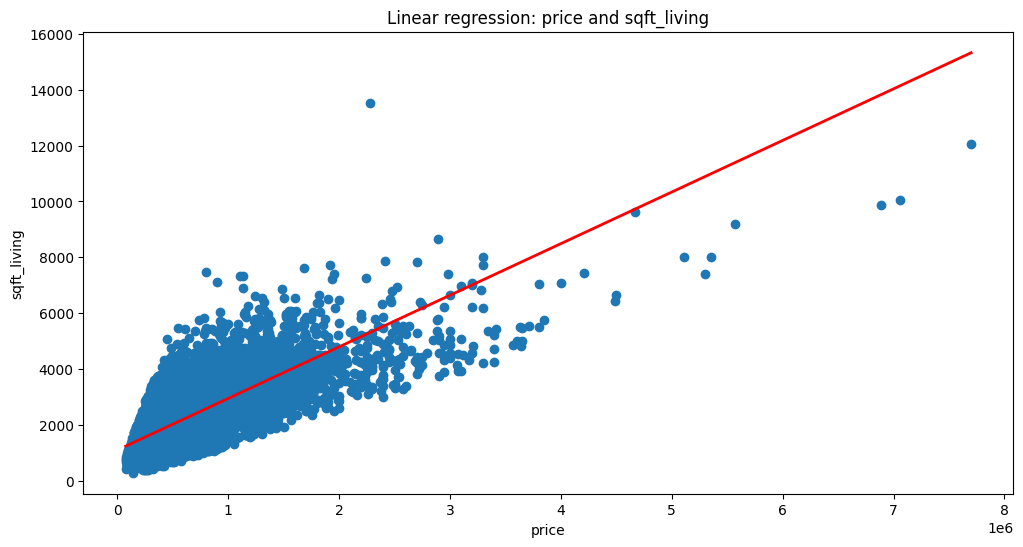

In [ ]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

model = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

#Evaluate

r2 = model.score(X_test_scaled, y_test)
coefficients = model.coef_
intercept = model.intercept_

#Visualize

fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(house_df['price'], house_df['sqft_living'])

start = house_df['price'].min()
end = house_df['price'].max()
xseq = np.linspace(start, end, num=100)

xseq_scaled = scaler.transform(xseq.reshape(-1, 1))

ax.plot(xseq, intercept + coefficients[0] * xseq_scaled.ravel(),
        color="red", lw=2.0, label='Fitted line')

ax.set_title('Linear regression: price and sqft_living')
ax.set_xlabel('price')
ax.set_ylabel('sqft_living')

plt.show()




In [ ]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third order

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(2, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("My mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 54053591747.298004
My mean squared error equals: 50205105777.510315
